In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Estimated_AA_neh_numbers_liverpool_liver_.csv")
data=data.dropna()
data=data.sort_values(by="Tritium")
print(data.shape)
data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
data.head(20)

(20, 8)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,symbol
18,Tryptophan (W),0.08,0.284706,0.273825,0.453589,0.120889,0.141418,0.263240,W
16,Threonine (T),0.20,0.300996,0.348101,0.400072,0.054454,0.063515,0.109795,T
4,Phenylalanine (F),0.32,0.522364,0.512131,0.528059,0.064915,0.074343,0.133719,F
19,Tyrosine (Y),0.42,0.906282,0.958345,1.010267,0.076068,0.086715,0.152816,Y
8,lysine (K),0.54,0.193860,0.045367,0.000000,0.102108,0.121878,0.214877,K
17,Valine (V),0.56,0.748300,0.736578,0.779141,0.046318,0.053666,0.091055,V
9,Leucine (L),0.60,0.922712,0.915660,0.969612,0.041741,0.048119,0.084139,L
7,Isoleucine (I),1.00,0.762408,0.763763,0.758786,0.056117,0.063857,0.112918,I
10,Methionine (M),1.12,0.967798,0.798996,1.023066,0.093801,0.116799,0.185956,M
1,Cysteine (C),1.62,1.728927,1.832656,1.922368,0.113611,0.138779,0.224604,C


In [3]:
data.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.892262,0.884437,0.867564,-0.159332,-0.156776,-0.186399
Asym_NEH,0.892262,1.000000,0.997896,0.994652,-0.273332,-0.265942,-0.293820
APE,0.884437,0.997896,1.000000,0.997776,-0.291777,-0.286218,-0.312948
MPE,0.867564,0.994652,0.997776,1.000000,-0.284711,-0.278559,-0.305926
Asym_NEH_ci,-0.159332,-0.273332,-0.291777,-0.284711,1.000000,0.997268,0.996480
APE_ci,-0.156776,-0.265942,-0.286218,-0.278559,0.997268,1.000000,0.991198
MPE_ci,-0.186399,-0.293820,-0.312948,-0.305926,0.996480,0.991198,1.000000


In [4]:
Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data.Tritium - data.APE)/data.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data.Tritium - data.MPE)/data.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.34296789488228624 0.5446477149024018
APE 0.3175962331926926 0.5328635342325799
MPE 0.2973509978232457 0.9875610958713394


In [5]:
# data2=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_utmb-liver_.csv")
# data2=data2.dropna()
# data2=data2.sort_values(by="Tritium")
# print(data2.shape)
# data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
# # data2.head(20)

In [6]:
# data2.corr()

In [7]:
# Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
# print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

# APE=abs(data2.Tritium - data2.APE)/data2.Tritium
# print('APE',np.median(APE),np.std(APE))

# MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
# print('MPE',np.median(MPE),np.std(MPE))

In [8]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

In [9]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.xticks(range(0,40,2),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


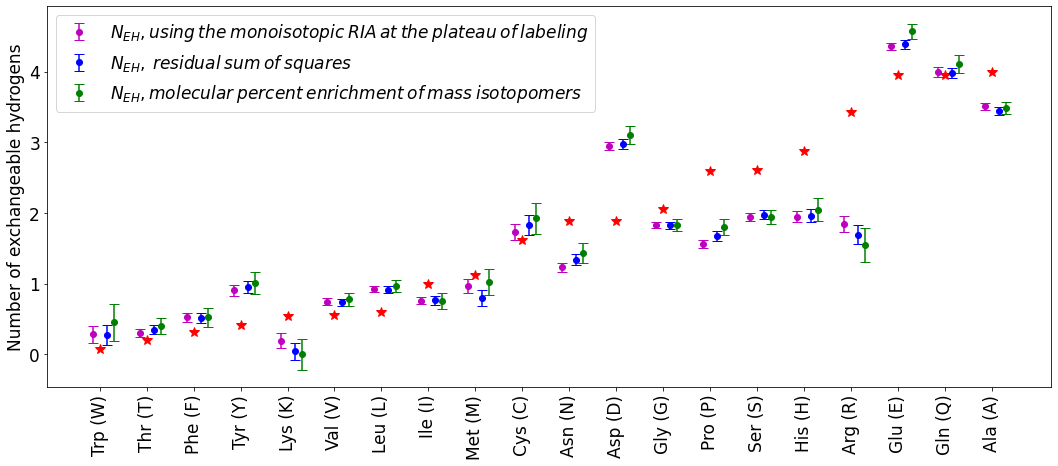

In [10]:
plot_neh_aa(data,'lv')
# plot_neh_aa(data2,'utmb')

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


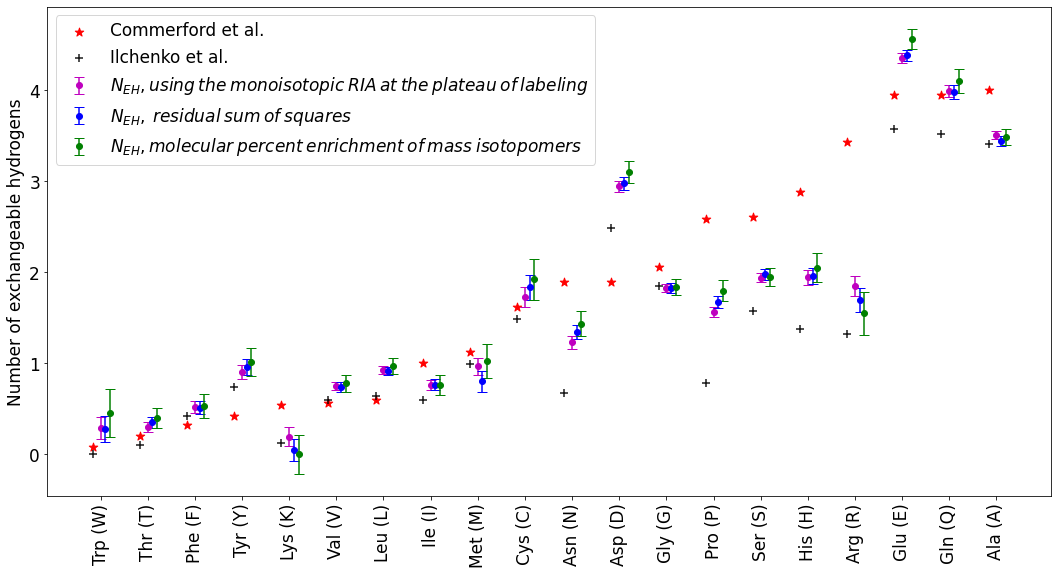

In [11]:
il={'A':3.41,     'C':1.49,     'D':2.490,     'E':3.58,     'F':0.418,     'G':1.844,    'H':1.372,     'I':0.592,
     'K':0.121,     'L':0.634,     'M':0.994,     'N':0.674,    'P':0.78,     'Q':3.517,     'R':1.326,     'S':1.574,
     'T':0.097,    'V':0.591,     'W':0.003,     'Y':0.74}
ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
data["il"]=[il[c] for c in data.symbol]
data["ck"]=[ck[c] for c in data.symbol]

def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,9)) 
#     plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10,label='Commerford et al.')
    
    
    temp_x=[x-0.5 for x in range(0,60,3)]    
    plt.scatter(temp_x, input_data['Tritium'],marker='*',s=80, color="r",label='Commerford et al.')    
    plt.scatter(temp_x, input_data['il'],marker='+',s=80, color="k",alpha=0.9,label='Ilchenko et al.')
#     plt.scatter(temp_x, input_data['ck'],marker='x',s=80, color="k",alpha=0.7,label='Peinado‐Izaguerri, Jorge, et al.')
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        k=i
#         if i ==0: k=-1
#         else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,60,3)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,60,3),input_data.AA_name,rotation=90)
    plt.xticks(range(0,60,3),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
#     plt.grid()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()
    
plot_neh_aa(data,'lv2')

In [12]:
# sorted(aa_sh_name.values(),key= lambda x: x[1])

In [13]:
sum(data['Tritium'] - data['APE'])

3.2660177033772078

In [14]:
def get_stat(col):
    temp=abs(data['Tritium'] - data[col])
    print(col,'\t',np.median(temp),np.std(temp))
get_stat('Asym_NEH')
get_stat('MPE')
get_stat('APE')

Asym_NEH 	 0.3344261055950205 0.394461548615793
MPE 	 0.4151000363039774 0.4125809404081747
APE 	 0.37790650682248483 0.39850649422320616


In [15]:
def get_rd(col):
    temp=data[data.symbol=='D']
    print(abs((float)((temp['Tritium'] - temp[col])/temp['Tritium'])))
get_rd('Asym_NEH')
get_rd('MPE')
get_rd('APE')

0.5588149535490847
0.6416365176084287
0.5758217984845185
